# Import Library

In [692]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [693]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.cluster import AgglomerativeClustering

import seaborn
import statistics

from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_absolute_percentage_error

# Load Dataset

Memasukkan dataset

In [694]:
data = pd.read_csv("https://raw.githubusercontent.com/vanggelina10/ALP_Data_Mining/main/Dataset_Terapi_Kelenjar_Getah_Bening.csv")
data

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,15,11.00,6.0,1.0,30,25.0,0
1,1,27,11.75,NaN,1.0,208,6.0,0
2,1,32,12.00,9.0,1.0,43,50.0,0
3,1,33,1.75,7.0,2.0,379,7.0,0
4,1,34,5.00,7.0,3.0,64,7.0,0
...,...,...,...,...,...,...,...,...
85,2,51,4.00,1.0,1.0,65,7.0,1
86,2,51,6.00,6.0,NaN,80,2.0,1
87,2,52,2.25,5.0,1.0,63,7.0,1
88,2,53,10.00,1.0,2.0,30,25.0,1


# EDA

Mengecek data apakah sudah bersih atau belum seperti tidak ada yang duplikat, tidak ada yang null, dll, selain itu dapat mengecek kolom data, tipe data,dll.

In [695]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
85    False
86    False
87    False
88    False
89    False
Length: 90, dtype: bool

In [696]:
data.isnull().sum()

gender                 0
age                    0
Time                   3
Number_of_Warts        1
Type                   5
Area                   0
induration_diameter    2
Result_of_Treatment    0
dtype: int64

In [697]:
data.describe()

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
count,90.000000,90.000000,87.000000,89.000000,85.000000,90.000000,88.000000,90.000000
mean,1.544444,31.044444,7.221264,6.123596,1.752941,95.700000,14.500000,0.788889
std,0.500811,12.235435,3.151325,4.231431,0.829599,136.614643,17.378147,0.410383
min,1.000000,15.000000,1.000000,1.000000,1.000000,6.000000,2.000000,0.000000
25%,1.000000,20.250000,5.000000,2.000000,1.000000,35.500000,5.000000,1.000000
50%,2.000000,28.500000,7.750000,6.000000,2.000000,53.000000,7.000000,1.000000
75%,2.000000,41.750000,10.000000,9.000000,2.000000,80.750000,9.000000,1.000000
max,2.000000,56.000000,12.000000,19.000000,3.000000,900.000000,70.000000,1.000000


In [698]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               90 non-null     int64  
 1   age                  90 non-null     int64  
 2   Time                 87 non-null     float64
 3   Number_of_Warts      89 non-null     float64
 4   Type                 85 non-null     float64
 5   Area                 90 non-null     int64  
 6   induration_diameter  88 non-null     float64
 7   Result_of_Treatment  90 non-null     int64  
dtypes: float64(4), int64(4)
memory usage: 5.8 KB


# Preparation Data

Rename Kolom dataset

In [699]:
data = data.rename(columns={'gender': 'Gender', 'age': 'Age','Number_of_Warts' : 'Number of Warts','induration_diameter' : 'Induration Diameter', 'Result_of_Treatment' : 'Result Treatment'})
data.head()

,Gender,Age,Time,Number of Warts,Type,Area,Induration Diameter,Result Treatment
0,1,15,11.00,6.0,1.0,30,25.0,0
1,1,27,11.75,NaN,1.0,208,6.0,0
2,1,32,12.00,9.0,1.0,43,50.0,0
3,1,33,1.75,7.0,2.0,379,7.0,0
4,1,34,5.00,7.0,3.0,64,7.0,0


In [700]:
datanorm= data.copy()
datanorm['Gender'] = data_norm['Gender'].replace(1, 'Male')
datanorm['Gender'] = data_norm['Gender'].replace(2, 'Female')

datanorm

,Gender,Age,Time,Number of Warts,Type,Area,Induration Diameter,Result Treatment
0,Male,15,11.00,6.0,1.0,30,25.0,0
1,Male,27,11.75,NaN,1.0,208,6.0,0
2,Male,32,12.00,9.0,1.0,43,50.0,0
3,Male,33,1.75,7.0,2.0,379,7.0,0
4,Male,34,5.00,7.0,3.0,64,7.0,0
...,...,...,...,...,...,...,...,...
85,Female,51,4.00,1.0,1.0,65,7.0,1
86,Female,51,6.00,6.0,NaN,80,2.0,1
87,Female,52,2.25,5.0,1.0,63,7.0,1
88,Female,53,10.00,1.0,2.0,30,25.0,1


In [701]:
datanorm['Result Treatment'] = datanorm['Result Treatment'].replace(0, 'Tidak Ada Kemajuan')
datanorm['Result Treatment'] = datanorm['Result Treatment'].replace(1, 'Ada Kemajuan')

datanorm

,Gender,Age,Time,Number of Warts,Type,Area,Induration Diameter,Result Treatment
0,Male,15,11.00,6.0,1.0,30,25.0,Tidak Ada Kemajuan
1,Male,27,11.75,NaN,1.0,208,6.0,Tidak Ada Kemajuan
2,Male,32,12.00,9.0,1.0,43,50.0,Tidak Ada Kemajuan
3,Male,33,1.75,7.0,2.0,379,7.0,Tidak Ada Kemajuan
4,Male,34,5.00,7.0,3.0,64,7.0,Tidak Ada Kemajuan
...,...,...,...,...,...,...,...,...
85,Female,51,4.00,1.0,1.0,65,7.0,Ada Kemajuan
86,Female,51,6.00,6.0,NaN,80,2.0,Ada Kemajuan
87,Female,52,2.25,5.0,1.0,63,7.0,Ada Kemajuan
88,Female,53,10.00,1.0,2.0,30,25.0,Ada Kemajuan


# Fill Nan Value

In [702]:
data1 = data.dropna()

In [703]:
X = data1[['Age']]
y = data1['Time']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 20)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_test, y_pred)))
LR_MAPE= mean_absolute_percentage_error(y_test, y_pred)*100
print("MAPE: ",LR_MAPE)
print(lr.score(X_test, y_test))

Root Mean Squared Error (RMSE):  2.3891326515880325
MAPE:  36.544689676672355
0.08672722769855001


In [704]:
data_timemiss = data["Time"].isna()
var_timemiss = pd.DataFrame(data[['Age']][data_timemiss])
time_pred = np.round(lr.predict(var_timemiss), 2)
missingval = data['Time'].isna()
data.loc[missingval,'Time'] = time_pred

In [705]:
data.iloc[[43,50,72]]

,Gender,Age,Time,Number of Warts,Type,Area,Induration Diameter,Result Treatment
43,1,38,7.56,8.0,2.0,56,45.0,1
50,1,54,8.46,13.0,3.0,43,5.0,1
72,2,28,7.00,4.0,1.0,9,2.0,1


In [706]:
data.isna().sum()

Gender                 0
Age                    0
Time                   0
Number of Warts        1
Type                   5
Area                   0
Induration Diameter    2
Result Treatment       0
dtype: int64

# Fill Nan Type with Mean

In [707]:
data["Time"].fillna(math.floor(data["Time"].mean()), inplace=True)
data["Induration Diameter"].fillna(math.floor(data["Induration Diameter"].mean()), inplace=True)
data["Number of Warts"].fillna(math.floor(data["Number of Warts"].mean()), inplace=True)
data["Type"].fillna(math.floor(data["Type"].mean()), inplace=True)

In [708]:
data.isna().sum()

Gender                 0
Age                    0
Time                   0
Number of Warts        0
Type                   0
Area                   0
Induration Diameter    0
Result Treatment       0
dtype: int64

# K-Means Clustering

In [709]:
from sklearn.cluster import KMeans
parameter = data

distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(parameter)
    distortions.append(kmeanModel.inertia_)
    print("K =", k, " ", distortions[k-1])

C:\Users\Win10\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K = 1   1703184.3975566665


C:\Users\Win10\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K = 2   430768.6631753048


C:\Users\Win10\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K = 3   221764.8049163763


C:\Users\Win10\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K = 4   127530.97457286969


C:\Users\Win10\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K = 5   89190.20522763158


C:\Users\Win10\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K = 6   60268.468344277324


C:\Users\Win10\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K = 7   44172.63076123483


C:\Users\Win10\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K = 8   36974.68286820888


C:\Users\Win10\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K = 9   31705.842352246927


C:\Users\Win10\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K = 10   26963.645048325357


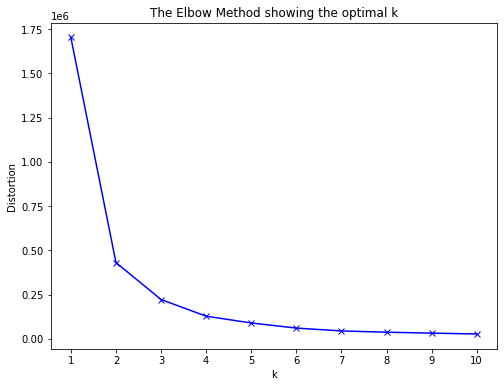

In [710]:
plt.figure(figsize=(8,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.xticks(np.arange(1,11,1))
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [711]:
from kneed import DataGenerator, KneeLocator

knee = KneeLocator(K, distortions, curve="convex", direction="decreasing")
print(knee.elbow)

3


In [712]:
kmeans = KMeans(init="random",n_clusters=4,max_iter=100, random_state=0).fit(data)
kmeansmodel = kmeans.fit_predict(data)
kmeansmodel

C:\Users\Win10\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Win10\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([3, 0, 3, 0, 3, 2, 2, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 1,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 0, 3, 3, 3, 2, 2, 1, 2, 3, 3, 2, 3,
       2, 3, 1, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 0, 3, 2, 0,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 1, 3, 3, 3, 3, 2, 0, 3, 3, 3, 2, 3,
       3, 2])

In [713]:
data0 = data
data0['K means'] = kmeansmodel

d = {'K means': data0['K means'].unique(),
     'Gender': data0.groupby('K means')['Gender'].max(), 
     'Age': data0.groupby('K means')['Age'].agg(pd.Series.mean), 
     'Time': data0.groupby('K means')['Time'].agg(pd.Series.mean),
     'Number of Warts': data0.groupby('K means')['Number of Warts'].agg(pd.Series.mean),
     'Type': data0.groupby('K means')['Type'].agg(pd.Series.mean),
     'Area': data0.groupby('K means')['Area'].agg(pd.Series.mean),
     'Induration Diameter': data0.groupby('K means')['Induration Diameter'].agg(pd.Series.mean),
     'Result Treatment': data0.groupby('K means')['Result Treatment'].agg(pd.Series.count)}
kesimpulan = pd.DataFrame(data=d)

kesimpulan.set_index('K means')

,Gender,Age,Time,Number of Warts,Type,Area,Induration Diameter,Result Treatment
K means,,,,,,,,
3,2,28.833333,7.125000,6.500000,1.333333,305.166667,6.500000,6
0,2,30.000000,7.687500,3.750000,1.500000,603.250000,21.750000,4
2,2,31.565217,7.413043,6.043478,1.826087,94.130435,15.652174,23
1,2,31.140351,7.145088,6.280702,1.719298,38.666667,14.350877,57


# Classification (KNN)

In [714]:
X = data.drop(['Result Treatment'], axis = 1)
y = data['Result Treatment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [715]:
classifier = KNeighborsClassifier(n_neighbors = 2, metric = "euclidean", p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=2)

In [716]:
y_pred =  classifier.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

In [717]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", cm)

print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix
 [[2 0]
 [4 3]]
Accuracy Score:  0.5555555555555556


# Linear Regression

In [718]:
X = data.drop(['Result Treatment'], axis = 1)
y = data['Result Treatment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [719]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print(regressor.predict(X_test))

[0.58563958 0.71250573 0.98978995 0.84592119 1.17018232 1.09688587
 0.87279346 0.81634419 0.67223045]


In [720]:
regressor = LinearRegression()
regressor.fit(data.drop(['Result Treatment'], axis = 1),data['Result Treatment'])

LinearRegression()

<AxesSubplot:>

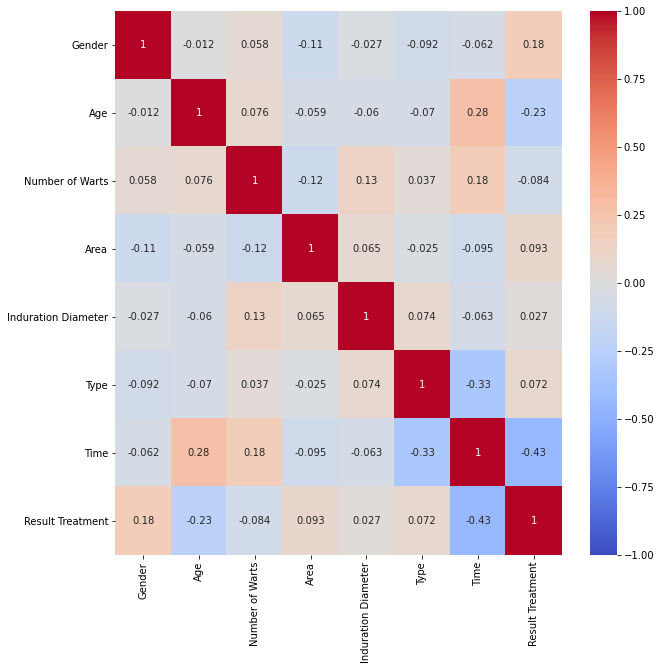

In [726]:
corr = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='coolwarm', annot=True,vmin=-1,vmax=1)

# Balanced Data

In [722]:
X = data[['Gender', 'Age', 'Number of Warts', 'Area', 'Induration Diameter','Type', 'Time']]
y = data['Result Treatment']
oversample = SMOTE(random_state = 0)
X_smote, y_smote = oversample.fit_resample(X, y)
data = pd.DataFrame(X_smote)
data["Result Treatment"] = y_smote

In [723]:
data.duplicated().sum()

0

C:\Users\Win10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Result Treatment', ylabel='count'>

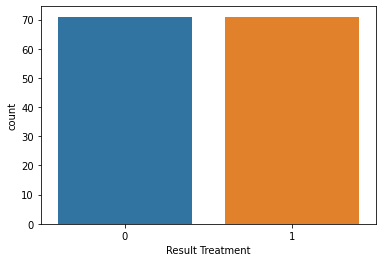

In [724]:
sns.countplot(data['Result Treatment'])

In [725]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               142 non-null    int64  
 1   Age                  142 non-null    int64  
 2   Number of Warts      142 non-null    float64
 3   Area                 142 non-null    int64  
 4   Induration Diameter  142 non-null    float64
 5   Type                 142 non-null    float64
 6   Time                 142 non-null    float64
 7   Result Treatment     142 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 9.0 KB
